## Project: WeRateDogs Analysis [Wrangling and Analyzing Data]

### Note: WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

The dataset for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

#### About The Ratings: 
These ratings almost always have a denominator of 10. 
The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. 
Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

#### Project Steps Overview
The anlysis of this project will follow these steps:

* Step 1: Gathering data
* Step 2: Assessing data
* Step 3: Cleaning data
* Step 4: Storing data
* Step 5: Analyzing, and visualizing data
* Step 6: Reporting

## STEP 1: Gathering Data

Here we will collect our data from all the different sources that stores the data we need.

In [1]:
# Importing libraries
import requests
import pandas as pd
import numpy as np
import re
import os
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

#### 1st Data source: 
CSV File localy downloaded via link below
* Content: Tweet Archive

`https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv`

In [2]:
# Reading the data into a pandas DataFrame.
tweet_archive = pd.read_csv('twitter-archive.csv')

# Getting Information about the dataset
tweet_archive[tweet_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


#### 2nd Data Source: 
Programmatically downloading files using the Requests library and the following URL below
* Content: Tweet Image predictions present in each tweet according to a neural network

`https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`

In [3]:
# Using request lib to get file from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Checking that the response was successfull
print(response)

<Response [200]>


In [5]:
# Save tsv file to local machine
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
# Reading the image-predictions data into a pandas DataFrame
img_pd = pd.read_csv('image-predictions.tsv', sep= '\t')

# Getting Information about the dataset
img_pd.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
img_pd[img_pd.p1_dog == False]
#img_pd[img_pd.p2_dog == False]
#img_pd[img_pd.p3_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [8]:
print(img_pd[img_pd['p1_dog'] == False].count(),
      '\n',img_pd[img_pd['p2_dog'] == False].count(),
      '\n',img_pd[img_pd['p3_dog'] == False].count())

tweet_id    543
jpg_url     543
img_num     543
p1          543
p1_conf     543
p1_dog      543
p2          543
p2_conf     543
p2_dog      543
p3          543
p3_conf     543
p3_dog      543
dtype: int64 
 tweet_id    522
jpg_url     522
img_num     522
p1          522
p1_conf     522
p1_dog      522
p2          522
p2_conf     522
p2_dog      522
p3          522
p3_conf     522
p3_dog      522
dtype: int64 
 tweet_id    576
jpg_url     576
img_num     576
p1          576
p1_conf     576
p1_dog      576
p2          576
p2_conf     576
p2_dog      576
p3          576
p3_conf     576
p3_dog      576
dtype: int64


#### 3rd Data Source: 
(Using the Tweepy library to query additional data via the Twitter API) Alternatively we are using tweet_json.txt
* Content: Twitter ID, Retweet count and favorite count

In [9]:
# Converting .TXT to Data Frame
# Creating an empty list to contain our data. A list to be converted to a DataFrame
tweet_jpd = []
with open('tweet_json.txt', 'r') as file:
    # Reading each line in the txt file
    for line in file:
        # Processing each line to a json file object / Python Dictionary
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        # Appending each json obsect to our empty list
        tweet_jpd.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [10]:
# Converting the populated list to a Pandas DataFrame
tweet_jpd = pd.DataFrame(tweet_jpd)

In [11]:
tweet_jpd.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## STEP 2: Assessing Data
In this section, we should detect and document at least **eight (8) quality issues and two (2) tidiness issue**. We must use **both** visual assessment and programmatic assessement to assess the data.

**Note:** We should pay attention to the following key points as we access the data.

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.


### Quality Issues

In [12]:
tweet_archive.info()

# tweet_id.sort_values()
# in_reply_to_status_id.isnull().value_counts()
# describe()
# unique()
# nunique()
# value_counts()
# isnull().value_counts()
# etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
tweet_archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

##### Tweeter Archive Data
1. The `timestamp` column has both date and time, `+0000` is not relevant
2. The `source` column has HTML tags with 4 unique tags, each indicating the source (either from iPhone, Web Client,Vine, Tweet Deck)
3. The ratings almost always have a denominator of 10 but `rating_denominator` column has values greater than ten (10)
4. The `timestamp` column is in object data type should be converted to datetime format

**5A** The `retweeted_status_id` column has 78 values 

**5B** The `retweeted_status_user_id` column has 78 values
 
**6A** The `in_reply_to_status_id` column has 181 values

**6B** The `in_reply_to_user_id` column has 181 values

**6C** The `retweeted_status_timestamp`column has 181 values

7. The `expanded_urls` has 59 missing values. A Good number of the links seems to have expired
8. The name column has `668` values of `None` and `55` values `a` 
9. The name columns has some strings in all lower case and some in title case

##### Image Prediction Data
10. Not all image predictions are dogs. some are book cases,shopping cart etc (p1_dog,p2_dog == False) with varying confidence level

### Tidyness Issues

In [14]:
# doggo	floofer	pupper	puppo

print(tweet_archive.doggo.value_counts(), '\n',
      '\n',tweet_archive.floofer.value_counts(), '\n',
      '\n',tweet_archive.pupper.value_counts(), '\n',
      '\n',tweet_archive.puppo.value_counts(), '\n')

# tweet_archive[tweet_archive.doggo == 'doggo']

None     2259
doggo      97
Name: doggo, dtype: int64 
 
 None       2346
floofer      10
Name: floofer, dtype: int64 
 
 None      2099
pupper     257
Name: pupper, dtype: int64 
 
 None     2326
puppo      30
Name: puppo, dtype: int64 



##### Tweeter Archive Data
1. `doggo`, `floofer` , `pupper` , `puppo` are all classification. Observation fall into just one of these category.

##### Image Prediction Data
2. The image url should be part of the Tweeter archive data


## STEP 3: Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Creating Copies of data
tad_copy = tweet_archive.copy()
ipd_copy = img_pd.copy()
rtc_copy = tweet_jpd.copy()

### Issue #1: The `timestamp` column has both date and time, `+0000` is not relevant 
**(Twitter Archive Data) QUALITY**

#### Define: Remove `+0000` from the timestamp column

#### Code

In [16]:
tad_copy.timestamp = tad_copy['timestamp'].str[:-5]

#### Test

In [17]:
tad_copy.timestamp.sample(10)

921     2016-07-22 00:43:32 
1186    2016-04-08 20:46:50 
178     2017-04-26 16:00:39 
294     2017-03-03 01:58:22 
1835    2015-12-13 18:10:33 
561     2016-11-26 21:26:58 
1229    2016-03-26 16:15:05 
31      2017-07-15 16:17:19 
1874    2015-12-11 02:08:58 
1784    2015-12-18 01:31:14 
Name: timestamp, dtype: object

### Issue #2: The `source` column has HTML tags with 4 unique tags, each indicating the source either from iPhone, WebClient,Vine, TweetDeck 
**(Twitter Archive Data) QUALITY**

#### Define: Replace each HTML tag with the corresponding tag, i.e. either iPhone, WebClient,Vine, TweetDeck
#### Code

In [18]:
tad_copy.source = tad_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone')
tad_copy.source = tad_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'WebClient')
tad_copy.source = tad_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
tad_copy.source = tad_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [19]:
tad_copy.source.unique()

array(['iPhone', 'WebClient', 'Vine', 'TweetDeck'], dtype=object)

### Issue #3: The ratings almost always have a denominator of 10 but `rating_denominator` column has values greater than ten (10)
**(Twitter Archive Data) QUALITY**

#### Define: Replace all values that are outliers with `10`

#### Code

In [20]:
tad_copy.loc[tad_copy["rating_denominator"] != int("10"), "rating_denominator"] = int("10")

#### Test

In [21]:
tad_copy["rating_denominator"].unique()

array([10], dtype=int64)

### Issue #4: The `timestamp` column is in object data type should be converted to datetime format
**(Twitter Archive Data) QUALITY**

#### Define: Convert the timestamp colum to Datetime

#### Code

In [22]:
tad_copy['timestamp'] = tad_copy['timestamp'].apply(pd.to_datetime)

#### Test

In [23]:
tad_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #5: Since we only want original ratings (no retweets) that have images. we have to remove in_reply_to_status_id,    in_reply_to_user_id
**(Twitter Archive Data) QUALITY**

#### Define: Drop rows that have values in in_reply_to_status_id, in_reply_to_user_id. Then Drop both columns since there are no values

#### Code

In [24]:
tad_copy = tad_copy[tad_copy['in_reply_to_status_id'].isnull()]
tad_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)
#tad_copy['in_reply_to_status_id'].isnull().value_counts()
# tad_copy['retweeted_status_user_id'].replace('', np.nan, inplace=True)

#### Test

In [25]:
tad_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   int64         
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   object        
 3   text                        2278 non-null   object        
 4   retweeted_status_id         181 non-null    float64       
 5   retweeted_status_user_id    181 non-null    float64       
 6   retweeted_status_timestamp  181 non-null    object        
 7   expanded_urls               2274 non-null   object        
 8   rating_numerator            2278 non-null   int64         
 9   rating_denominator          2278 non-null   int64         
 10  name                        2278 non-null   object        
 11  doggo                       2278 non-null   object      

### Issue #6: Columns `retweeted_status_timestamp`, `retweeted_status_user_id` and  `retweeted_status_id` have 181 values 
**(Twitter Archive Data) QUALITY**

#### Define: Drop the above named columns

#### Code

In [26]:
tad_copy.drop(['retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_id'], axis=1, inplace=True)

#### Test

In [27]:
tad_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2278 non-null   int64         
 1   timestamp           2278 non-null   datetime64[ns]
 2   source              2278 non-null   object        
 3   text                2278 non-null   object        
 4   expanded_urls       2274 non-null   object        
 5   rating_numerator    2278 non-null   int64         
 6   rating_denominator  2278 non-null   int64         
 7   name                2278 non-null   object        
 8   doggo               2278 non-null   object        
 9   floofer             2278 non-null   object        
 10  pupper              2278 non-null   object        
 11  puppo               2278 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 231.4+ KB


### Issue #7: The `expanded_urls` has 59 missing values. A Good number of the links seems to have expired.
**(Twitter Archive Data) QUALITY**

#### Define: Drop The expanded_urls column

#### Code

In [28]:
from bs4 import BeautifulSoup
import requests

'''rspn = []

for i in tad_copy.expanded_urls:
    url = i
    response = requests.get(url)
    rspn.append(response)
    
rspn.uniqe()
'''

tad_copy.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [29]:
tad_copy.name.value_counts()

None          668
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Gert            1
Dex             1
Ace             1
Tayzie          1
Christoper      1
Name: name, Length: 956, dtype: int64

### Issue #8: The name column has `668` values of `None` and `55` values `a` 
**(Twitter Archive Data) QUALITY**

#### Define: Replace "None" and "a" with numpy nan

#### Code

In [30]:
tad_copy.name.replace(['None', 'a'], np.nan, inplace=True)
#tad_copy.name.value_counts()

#### Test

In [31]:
tad_copy.name.value_counts().head(10)

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
Penny      10
Lola       10
Winston     9
Bo          9
Sadie       8
Name: name, dtype: int64

### Issue #9: doggo, floofer , pupper , puppo are all classification. Observation fall into just one of these category.
**(Twitter Archive Data) TIDYNESS**

#### Define: 
1. Replace 'None' with numpy.nan
2. Melt the columns - doggo, floofer , pupper , puppo
3. Replace 'nan' with 'not categorized'
#### Code

In [32]:
tad_copy.doggo.replace('None', np.nan, inplace=True)
tad_copy.floofer.replace('None', np.nan, inplace=True)
tad_copy.pupper.replace('None', np.nan, inplace=True)
tad_copy.puppo.replace('None', np.nan, inplace=True)

In [33]:
tad_melt = tad_copy[~((tad_copy['doggo'] != 'doggo') & (tad_copy['floofer'] != 'floofer') & (tad_copy['pupper'] != 'pupper') & (tad_copy['puppo'] != 'puppo'))]
tad_melt.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,2017-07-26 15:59:51,iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,NaN,NaN,NaN
12,889665388333682689,2017-07-25 01:55:32,iPhone,Here's a puppo that seems to be on the fence a...,13,10,NaN,NaN,NaN,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04,iPhone,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,NaN,NaN,NaN,puppo
29,886366144734445568,2017-07-15 23:25:31,iPhone,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,NaN,NaN,pupper,NaN
43,884162670584377345,2017-07-09 21:29:42,iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,NaN,NaN,NaN


In [34]:
tad_melted = pd.melt(tad_melt, 
                   id_vars= ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                   var_name= 'classification', 
                   value_name='category')

In [35]:
tad_melted.drop('classification', axis=1, inplace=True)

In [36]:
tad_melted.category.fillna('not categorized', inplace=True)

#### Test

In [37]:
tad_melted.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,category
708,676470639084101634,2015-12-14 18:35:43,iPhone,Three generations of pupper. 11/10 for all htt...,11,10,NaN,not categorized
1449,676603393314578432,2015-12-15 03:23:14,iPhone,This is Godzilla pupper. He had a ruff childho...,9,10,Godzilla,not categorized
732,673148804208660480,2015-12-05 14:35:56,iPhone,This is Fletcher. He's had a ruff night. No mo...,8,10,Fletcher,not categorized
175,749075273010798592,2016-07-02 03:00:36,Vine,This is Boomer. He's self-baptizing. Other dog...,11,10,Boomer,doggo
237,704347321748819968,2016-02-29 16:47:42,iPhone,This is Ralphson. He's very confused. Wonderin...,10,10,Ralphson,not categorized
333,676603393314578432,2015-12-15 03:23:14,iPhone,This is Godzilla pupper. He had a ruff childho...,9,10,Godzilla,not categorized
59,825120256414846976,2017-01-27 23:16:13,iPhone,RT @dog_rates: Say hello to Pablo. He's one go...,12,10,Pablo,not categorized
354,673697980713705472,2015-12-07 02:58:09,iPhone,This is Pickles. She's a tiny pointy pupper. A...,8,10,Pickles,not categorized
76,818588835076603904,2017-01-09 22:42:41,iPhone,RT @dog_rates: This is Chelsea. She forgot how...,11,10,Chelsea,not categorized
163,752334515931054080,2016-07-11 02:51:40,iPhone,Here's a doggo trying to catch some fish. 8/10...,8,10,NaN,doggo


### Issue #10:  The image url from the image prediction date should be part of the Tweeter archive data
**(Image Prediction Data) TTIDYNESS**

For us to be able to merge we have to deal with quality issue #9 on the Twitter Archive Data which we have melted

In [38]:
tad_melted.name =tad_melted.name.str.title()

#### Define: Merge the jpg_url to the teeter archive data melted
#### Code

In [39]:
ipd_tomerge = ipd_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog'], axis=1)
ipd_tomerge = ipd_tomerge.drop(['p3', 'p3_conf', 'p3_dog'], axis=1)

In [40]:
#ipd_tomerge.head()'
tad_melted = pd.merge(tad_melted, ipd_tomerge, on='tweet_id')

#### Test

In [41]:
tad_melted.sample(8)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,category,jpg_url
1174,674447403907457024,2015-12-09 04:36:06,iPhone,This pupper just wants a belly rub. This puppe...,10,10,NaN,pupper,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg
1030,681694085539872773,2015-12-29 04:31:49,iPhone,This is Bo. He's a Benedoop Cumbersnatch. Seem...,11,10,Bo,pupper,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg
114,845397057150107648,2017-03-24 22:08:59,iPhone,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,not categorized,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg
1033,681679526984871937,2015-12-29 03:33:58,iPhone,Can you spot Toby the guilty pupper? 7/10 woul...,7,10,NaN,not categorized,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg
1200,673697980713705472,2015-12-07 02:58:09,iPhone,This is Pickles. She's a tiny pointy pupper. A...,8,10,Pickles,not categorized,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg
1031,681694085539872773,2015-12-29 04:31:49,iPhone,This is Bo. He's a Benedoop Cumbersnatch. Seem...,11,10,Bo,not categorized,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg
272,817181837579653120,2017-01-06 01:31:47,iPhone,RT @dog_rates: Here's a pupper with squeaky hi...,13,10,NaN,not categorized,https://pbs.twimg.com/ext_tw_video_thumb/81596...
752,707411934438625280,2016-03-09 03:45:22,iPhone,"""I shall trip the big pupper with leash. Big p...",11,10,NaN,not categorized,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg


## STEP 4: Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

**Before we store our data we need to merge the `retweet_count` and `favorite_count` from `tweeter api data` to the melted tweeter archive data**

In [53]:
tweet_data = pd.merge(tad_melted, rtc_copy, on='tweet_id')

#### Additional Cleaning

In [54]:
# Re-odering the columns of the dataframe
tweet_data = tweet_data[['tweet_id', 'timestamp', 'text', 'source', 'rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count','name', 'category', 'jpg_url']]

#since all denominator are 10, we are dropping the rating_denominator column
tweet_data.drop('rating_denominator', axis=1, inplace=True)

In [55]:
# Converting tweet_id to string
tweet_data.tweet_id = str(tweet_data.tweet_id)

#### Storing Data Code 

In [56]:
tweet_data.to_csv('twitter_archive_master.csv', sep=';', index = False)

In [57]:
tweet_data.head(1)

,tweet_id,timestamp,text,source,rating_numerator,retweet_count,favorite_count,name,category,jpg_url
0,0 890240255349198849\n1 8902402553...,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,iPhone,14,7711,32467,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


## STEP 5: Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
tweet_data.describe()

,rating_numerator,retweet_count,favorite_count
count,1268.000000,1268.000000,1268.000000
mean,11.151420,4127.621451,10772.328076
std,1.969565,7795.691771,16374.258849
min,3.000000,83.000000,0.000000
25%,10.000000,885.000000,2660.000000
50%,11.000000,1846.000000,5005.000000
75%,12.000000,3917.000000,12376.000000
max,27.000000,79515.000000,132810.000000


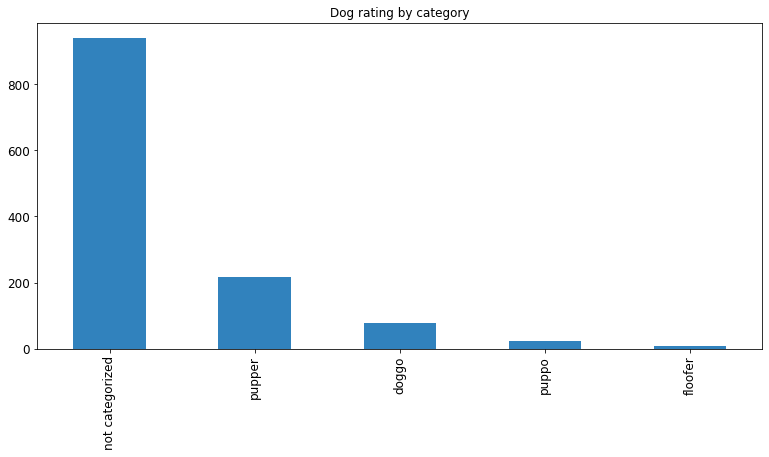

In [48]:
# Plotting a bar chart for the category column
tweet_data.category.value_counts().plot(kind= 'bar', figsize = (13,6), fontsize=12, colormap='tab20c')
plt.title('Dog rating by category');

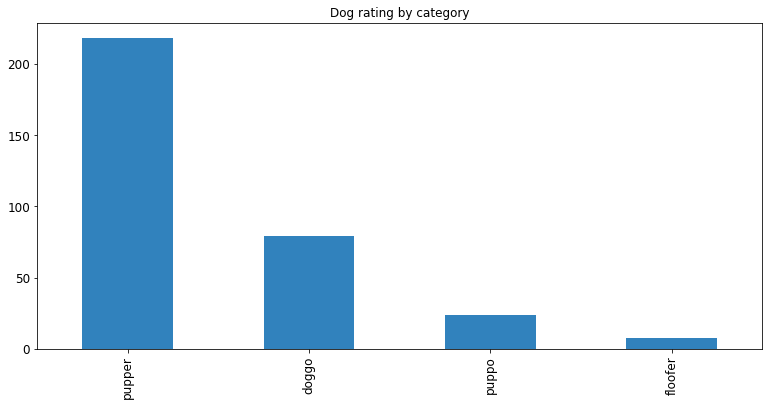

In [49]:
# Plotting a bar chart for the category column excluding those not categorized
tweet_data[tweet_data.category != 'not categorized'].category.value_counts().plot(kind= 'bar', figsize = (13,6), fontsize=12, colormap='tab20c')
plt.title('Dog rating by category');

### Insights:
1. Majority of the Dogs are not categorized

2. Majority of the Categorized Dogs fall under the `pupper` category

3. While there is no correlation between (i)`ratings and retweets`, (ii)`Favorite Count and Rating`. There is positive correlation between the retweet a Dog post gets and the Favorite it also gets

### Visualization

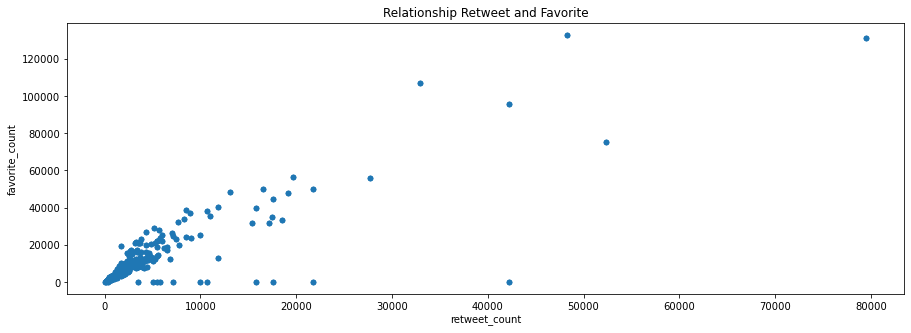

In [50]:
# Visualizing the correlation between the retweets a dogs get and the number of favorite it gets
tweet_data.plot(x= 'retweet_count',y='favorite_count', kind = 'scatter', figsize=(15,5))
plt.title('Relationship Retweet and Favorite');

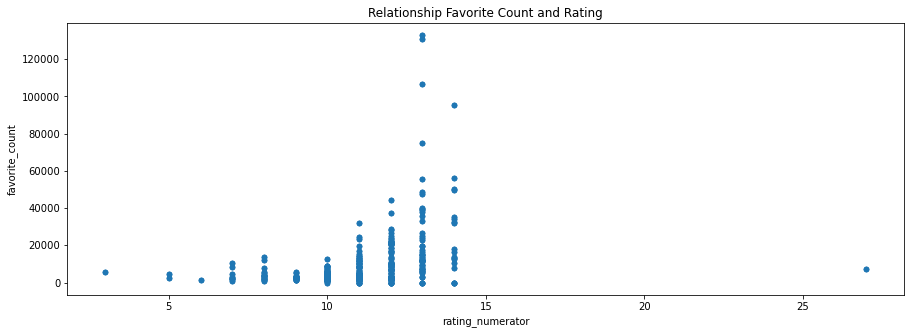

In [51]:
# Finding the correlation between the rating a dogs get and the number of favorite it gets
tweet_data.plot(x= 'rating_numerator',y='favorite_count', kind = 'scatter', figsize=(15,5))
plt.title('Relationship Favorite Count and Rating');

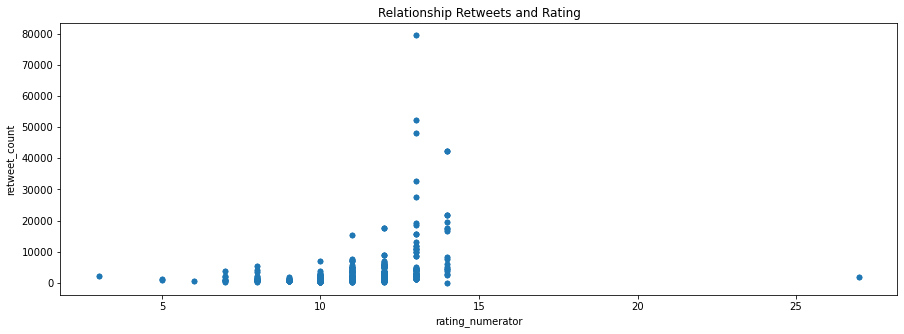

In [52]:
# Finding the correlation between the rating a dogs get and the number of retweets it gets
tweet_data.plot(x= 'rating_numerator',y='retweet_count', kind = 'scatter', figsize=(15,5))
plt.title('Relationship Retweets and Rating');